In [48]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import time

plt.rcParams.update({'font.size': 18})

In [49]:
h5_file = "test_file.h5"

Reading test_file.h5


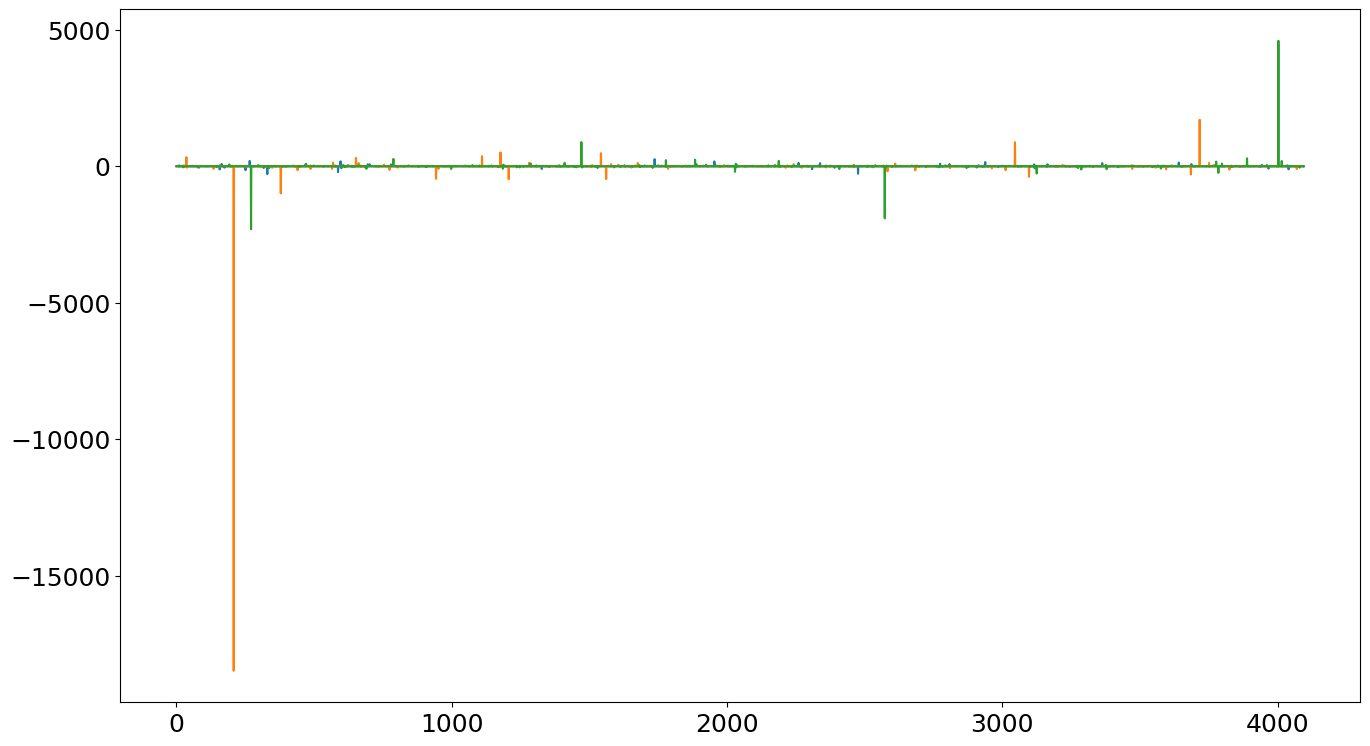

In [52]:
print ("Reading",h5_file)
hf = h5py.File(h5_file, 'r')

len_data = hf["data/timestamps"][()].shape[0]
len_cal_data = int(len_data/3)

ant_index  = np.where(hf["data/obssource"][()]==0)[0][0:len_cal_data]
cold_index = np.where(hf["data/obssource"][()]==1)[0][0:len_cal_data]
hot_index  = np.where(hf["data/obssource"][()]==2)[0][0:len_cal_data]

ant_data = hf["data/radio"][()][ant_index, :]
cold_data = hf["data/radio"][()][cold_index, :]
hot_data = hf["data/radio"][()][hot_index, :]

# print(ant_data.shape, cold_data.shape, hot_data.shape)
ant_calibrated = ant_data/(hot_data - cold_data)

plt.figure(figsize=(16,9))
plt.plot(ant_calibrated.T)

# print (bytes(hf["data/obssource"][0]).decode("ascii"))
# print (hf["data/obssource"][()].shape)
hf.close()